## LABORATORIO 2 - GRUPO 6
# CIUDADANIA DIGITAL
> La ciudadanía digital es el espacio donde es posible aprender, certificarse y entrar en contacto con otras personas interesadas en transformar digital y productivamente sus vidas.
### INTEGRANTES DEL EQUIPO
* MARIA PAULA MOGOLLON
* SERGIO NICOLAS QUINTERO
* LIDA VIVIANA PINEDA


> Para el ejercio vamos a utilizar la fuente de ***gov.co*** que se llama *Ciudadania Digital*
> Enlace: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Ciudadan-a-Digital/g4cd-bvpd/about_data

In [1]:
# Importar librerias
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3



<pre>Se realiza la generación del data set para _Ciudadania Digital_ para iniciar la validación de la información</pre>

In [2]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    df_Ciudadania_digital = pd.read_csv('C:/Users/User/Documents/ejercicios python/Laboratorio2/data/Ciudadan_a_Digital_20240418.csv')

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente.")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e:
    
    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se pudo encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:
    
    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

C:\Users\User\AppData\Local\Temp\ipykernel_25420\2562203358.py:3: DtypeWarning: Columns (3,7,8,20,26,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Ciudadania_digital = pd.read_csv('C:/Users/User/Documents/ejercicios python/Laboratorio2/data/Ciudadan_a_Digital_20240418.csv')


El dataset se cargó exitosamente.


* Se detecta durante la lectura del archivo, que existen 6 columnas que tienen datos mixtos, las cuales se deben ajustar

In [3]:
#Consulta y creación de data set, para validar cantidad de columnas y datos a trabajar
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset
df_Ciudadania_digital = pd.DataFrame(df_Ciudadania_digital)

# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_Ciudadania_digital.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'El DataFrame, tiene {num_rows} filas y {num_cols} columnas.')

El DataFrame, tiene 1058349 filas y 49 columnas.


In [6]:
#se realiza la revisiòn de 10 registros aleatorios para validar lo de las primeras columnas identificadas
df_Ciudadania_digital.sample(10)

,TIPO DE DOCUMENTO,DOCUMENTO,NOMBRES,APELLIDOS,EMAIL,CELULAR,TELEFONO,DEPARTAMENTO NACIMIENTO,CIUDAD DE NACIMIENTO,DEPARTAME_NOMBRE,...,VIRTUAL,ID INDICADOR,FechaCorte,FECHA VIGENCIA,META,INVERSION,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
507679,C�dula de Ciudadan�a,False,Lina Mar�a,Monta�a Chipiaje,False,False,False,NaN,NaN,NaN,...,0,3987,2014-12-31,2014-12-31,1000,",00",99773,NaN,NaN,NaN
501498,CC,False,GERARDO,MOLANO MOLANO,False,False,False,BOGOTA D. C.,BOGOTA D.C.,CAUCA,...,1,4783,2017-12-31,2017-12-31,432000,NaN,19397,NaN,NaN,NaN
3795,Cedula de ciudadani�a,False,ADRIANA,ACOSTA,False,False,False,-,-,NaN,...,0,5857,2018-12-31,2018-12-31,62000,",00",70001,NaN,NaN,NaN
9448,Cedula de Ciudadania,False,luis abelardo,agudelo jimenez,False,False,False,NaN,NaN,Cundinamarca,...,0,3987,2013-12-31,2013-12-31,1000,",00",25290,NaN,NaN,NaN
980658,Tarjeta de Identidad,False,Daniel Diaz Rodriguez,NaN,False,False,False,NaN,NaN,NaN,...,0,3987,2014-12-31,2014-12-31,1000,",00",97001,NaN,NaN,NaN
924137,C�dula de Ciudadan�a,False,Daniel Acevedo Garzon,NaN,False,False,False,NaN,NaN,NaN,...,0,3987,2014-12-31,2014-12-31,1000,",00",47053,NaN,NaN,NaN
609522,CC,False,CARLOS FRANCISCO,PARRA SANDOVAL,False,False,False,VALLE DEL CAUCA,CALI,TOLIMA,...,1,4783,2017-12-31,2017-12-31,432000,NaN,73001,NaN,NaN,NaN
315412,C�dula de Ciudadan�a,False,Leonor,G�mez Acevedo,False,False,False,NaN,NaN,NaN,...,0,3987,2014-12-31,2014-12-31,1000,",00",54001,NaN,NaN,NaN
148946,Cedula de Ciudadania,False,JHON ESTEBAN,CARDOZO HOYOS,False,False,False,NaN,NaN,Valle del Cauca,...,0,3987,2012-12-31,2012-12-31,1000,",00",76869,NaN,NaN,NaN
588692,TI,False,JESUS DAVID,OTALVARO SALAZAR,False,False,False,CALDAS,MANIZALES,CALDAS,...,1,4783,2017-12-31,2017-12-31,432000,NaN,17001,NaN,NaN,NaN


In [5]:
#se realiza listado de las columnas, para identificar columnas a utilizar dentro del analisis
df_Ciudadania_digital.columns

Index(['TIPO DE DOCUMENTO', 'DOCUMENTO', 'NOMBRES', 'APELLIDOS', 'EMAIL',
       'CELULAR', 'TELEFONO', 'DEPARTAMENTO NACIMIENTO',
       'CIUDAD DE NACIMIENTO', 'DEPARTAME_NOMBRE', 'MUNICIPIO_NOMBRE',
       'DIRECCION', 'NIVEL EDUCATIVO', 'SECTOR', 'ESTRATO',
       'FECHA DE NACIMIENTO', 'EDAD', 'EDAD 2', 'GENERO', 'DISCAPACIDAD',
       'ALIADO', 'SECTOR ECONOMICO', 'OCUPACION', 'FECHA DE REGISTRO',
       'COMUNIDAD ETNICA', 'F TICS', 'DINAMIZADOR', 'POBREZA',
       'CABEZA DE HOGAR', 'VICTIMA DE VIOLENCIA', 'VICTIMA INVIERNO', 'LGBTI',
       'VIVIENDA FRONTERIZA', 'SITUACION DE CALLE', 'DESPLAZADO',
       'DESMOVILIZADO REINSERTADO', 'CERTIFICACIONES', 'TIPO', 'PRESENCIAL',
       'VIRTUAL', 'ID INDICADOR', 'FechaCorte', 'FECHA VIGENCIA', 'META',
       'INVERSION', 'MUNICIPIO_COD', 'DEPARTAME_COD',
       'CODIGO DEPARTAMENTO NACIMIENTO', 'CODIGO MUNICIPIO NACIMIENTO'],
      dtype='object')

* Se realiza una primera validación de información detectando que los siguientes campos no tienen información
  * EDAD 2
  * DEPARTAMENTO CODE
  * CODIGO DEPARTAMENTO NACIMIENTO
  * CODIGO MUNICIPIO DEPARTAMENTO
* Se identifica que hay nombres y apellido de personas, por normas de seguridad información se eliminara esta informaciòn

In [7]:
## revisión información general del conjunto de datos
df_Ciudadania_digital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058349 entries, 0 to 1058348
Data columns (total 49 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   TIPO DE DOCUMENTO               1058349 non-null  object 
 1   DOCUMENTO                       1058349 non-null  bool   
 2   NOMBRES                         1058345 non-null  object 
 3   APELLIDOS                       900200 non-null   object 
 4   EMAIL                           1058349 non-null  bool   
 5   CELULAR                         1058349 non-null  bool   
 6   TELEFONO                        1058349 non-null  bool   
 7   DEPARTAMENTO NACIMIENTO         285403 non-null   object 
 8   CIUDAD DE NACIMIENTO            285403 non-null   object 
 9   DEPARTAME_NOMBRE                853583 non-null   object 
 10  MUNICIPIO_NOMBRE                1031684 non-null  object 
 11  DIRECCION                       1058349 non-null  bool   
 12  

In [8]:
#validar las variables, y si pueden ser leidas por python
df_Ciudadania_digital.describe()

,EDAD 2,F TICS,POBREZA,CABEZA DE HOGAR,VICTIMA DE VIOLENCIA,VICTIMA INVIERNO,LGBTI,VIVIENDA FRONTERIZA,SITUACION DE CALLE,DESPLAZADO,DESMOVILIZADO REINSERTADO,PRESENCIAL,VIRTUAL,ID INDICADOR,META,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
count,0.0,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,0.0,0.0,0.0
mean,NaN,1.782966e-02,8.803334e-03,7.862435e-02,5.573776e-03,8.163659e-04,1.703597e-03,2.271462e-03,2.579489e-04,6.293765e-03,2.532246e-04,9.694156e-02,4.983876e-01,4.324643e+03,1.093549e+05,4.011796e+04,NaN,NaN,NaN
std,NaN,1.323321e-01,9.341223e-02,2.691517e-01,7.444941e-02,2.856047e-02,4.123950e-02,4.760572e-02,1.605872e-02,7.908324e-02,1.591102e-02,2.958783e-01,1.905893e+00,6.185810e+02,1.857382e+05,2.820074e+04,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,1.000000e+03,1.300100e+04,NaN,NaN,NaN
50%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,1.000000e+03,2.781000e+04,NaN,NaN,NaN
75%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.783000e+03,6.200000e+04,6.800100e+04,NaN,NaN,NaN
max,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.400000e+01,6.632000e+03,4.320000e+05,9.977300e+04,NaN,NaN,NaN


In [9]:
# Descripción estadística de las variables numéricas sin notación científica

# Se configura la forma en que los números flotantes se muestran al imprimir un DataFrame en pandas.
    # Se define función lambda que toma un número x y devuelve ese número formateado con 1 decimal.

pd.set_option('display.float_format', lambda x: '%.1f' % x)

df_Ciudadania_digital.describe()

,EDAD 2,F TICS,POBREZA,CABEZA DE HOGAR,VICTIMA DE VIOLENCIA,VICTIMA INVIERNO,LGBTI,VIVIENDA FRONTERIZA,SITUACION DE CALLE,DESPLAZADO,DESMOVILIZADO REINSERTADO,PRESENCIAL,VIRTUAL,ID INDICADOR,META,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
count,0.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,0.0,0.0,0.0
mean,NaN,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.5,4324.6,109354.9,40118.0,NaN,NaN,NaN
std,NaN,0.1,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.3,1.9,618.6,185738.2,28200.7,NaN,NaN,NaN
min,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,0.0,0.0,NaN,NaN,NaN
25%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,13001.0,NaN,NaN,NaN
50%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,27810.0,NaN,NaN,NaN
75%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4783.0,62000.0,68001.0,NaN,NaN,NaN
max,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34.0,6632.0,432000.0,99773.0,NaN,NaN,NaN


In [10]:
# Descripción de las variables categóricas

df_Ciudadania_digital.describe(include = ['object'])

,TIPO DE DOCUMENTO,NOMBRES,APELLIDOS,DEPARTAMENTO NACIMIENTO,CIUDAD DE NACIMIENTO,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,NIVEL EDUCATIVO,SECTOR,ESTRATO,...,ALIADO,SECTOR ECONOMICO,OCUPACION,FECHA DE REGISTRO,COMUNIDAD ETNICA,DINAMIZADOR,TIPO,FechaCorte,FECHA VIGENCIA,INVERSION
count,1058349,1058345,900200,285403,285403,853583,1031684,1058349,517441,1058349,...,262994,445678,681592,326544,546042,212957,62521,1058349,1058349,795356
unique,13,359937,438148,35,1010,75,1505,13,7,8,...,271,1864,6266,937,21,120,3,8,8,7
top,Cedula de Ciudadania,JUAN CARLOS,RODRIGUEZ,BOGOTA D. C.,BOGOTA D.C.,Antioquia,BOGOT� D.C.,No registra,Urbano,PENDIENTE CLASIFICAR,...,Computadores para Educar,No registra,Docente,2017-11-24 00:00:00.0000000,Ninguno,DIEGO FERNANDO CHAPARRO AYALA,VIRTUAL,2013-12-31,2013-12-31,",00"
freq,517457,3279,1966,87557,91891,50056,67351,520335,447115,523664,...,129188,174594,197023,30803,489905,68576,29483,365941,365941,795350


In [11]:
# Identificar valores únicos por  de Ciudadano Digital
print("\n Valores únicos por columna:")
for column in df_Ciudadania_digital.columns:
    unique_values = df_Ciudadania_digital[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("....")


 Valores únicos por columna:

TIPO DE DOCUMENTO (13 valores únicos):
['Cedula de Ciudadania' 'CC' 'C�dula de Ciudadan�a' 'TI'
 'Tarjeta de Identidad' 'Cedula de ciudadani�a' 'C�dula de ciudadan�a'
 'NUIP' 'PA' 'C�dula de Extranjer�a']
....

DOCUMENTO (1 valores únicos):
[False]

NOMBRES (359938 valores únicos):
['FERNANDEZ DE' 'CLEMENCIA INES' 'MARIA SULAY' 'MARIA DEL ROSARIO'
 'CAROLINA' 'SAMMY NATALIA' 'fredygarcia' 'EIDER ENRRIQUE' 'Jose Rodrigo'
 nan]
....

APELLIDOS (438149 valores únicos):
['0' '0LAYA REYES' '0RTEGA ORTIZ' '0SPINO PE�ATE' '0SSA' '1006456908'
 '11221617' '1143127905' '12114971' '2']
....

EMAIL (1 valores únicos):
[False]

CELULAR (2 valores únicos):
[False  True]

TELEFONO (2 valores únicos):
[False  True]

DEPARTAMENTO NACIMIENTO (36 valores únicos):
[nan 'BOYACA' 'VALLE DEL CAUCA' 'TOLIMA' 'LA GUAJIRA' 'MAGDALENA'
 'BOGOTA D. C.' 'CESAR' 'CUNDINAMARCA' '-']
....

CIUDAD DE NACIMIENTO (1011 valores únicos):
[nan 'PUERTO BOYACA' 'CALI' 'IBAGUE' 'RIOHACHA' 'SANTA

ValueError: List of boxplot statistics and `positions` values must have same the length

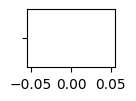

In [13]:
# Identificar valores atípicos en las variables numéricas
numeric_cols = df_Ciudadania_digital.select_dtypes(include=['float','int64','bool']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(9, 9, i)
    sns.boxplot(data = df_Ciudadania_digital, x = col)

plt.tight_layout()
plt.show()